In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

In [6]:
def midval(a, b, c):
    maxx = max(max(a,b), c)
    minn = min(min(a, b), c)
    
    return a + b + c - maxx - minn

Text(0, 0.5, 'EOW')

Text(0, 0.5, 'EOW')

(0.0, 175000.0)

(0.0, 175000.0)

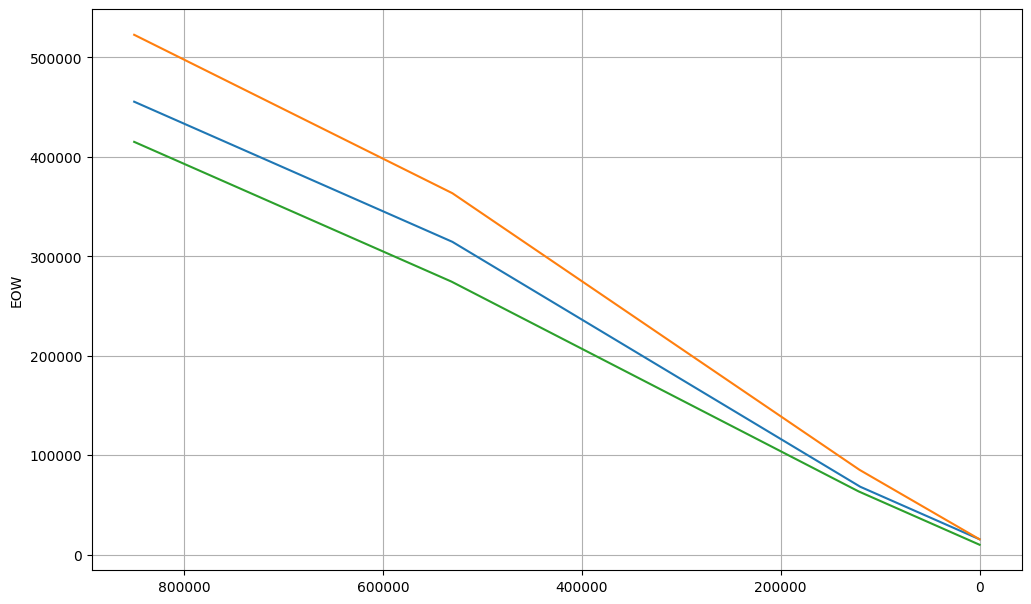

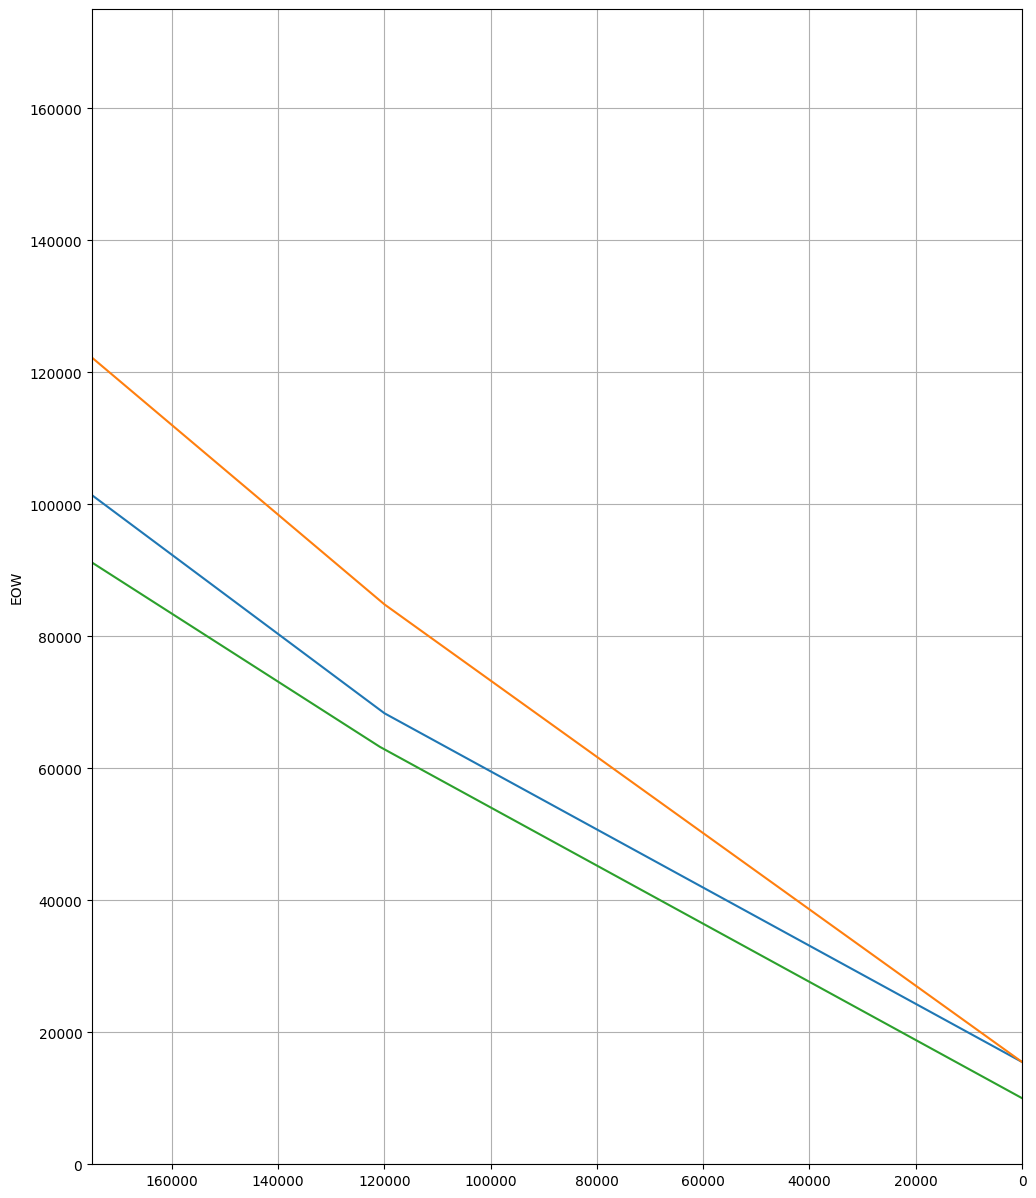

In [23]:


def emep2_(drpred):
    
    emep_c1 = [40761, 958, 10018]
    emep_c2 = [0.4404, 0.5155, 0.4404]
    
    eow_spt = [530000, 120000, -100000]
    
    
    iel = 0
    while (drpred < eow_spt[iel]):
        iel += 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep

def en2_(drpred):
    
    en_c1 = [81141, -3712, 15500]
    en_c2 = [0.4404, 0.6005, 0.4404]
    
    eow_spt = [530000, 120000, -100000]
    
    iel = 0
    while (drpred < eow_spt[iel]):
        iel += 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [99543.7, 3311.6, 15500]
    es_c2 = [0.49789, 0.67946, 0.57789]

    eow_spt = [530000, 120000, -100000]

    iel = 0
    while (drpred < eow_spt[iel]):
        iel += 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es




drpred = np.linspace(0, 850000, 1000)

en2 = [en2_(r) for r in drpred]
emep2 = [emep2_(r) for r in drpred]
es2 = [es2_(r) for r in drpred]



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_aspect('equal')

plt_.invert_xaxis()


plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()



plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)


plt_.set_xlim([0, 175000])
plt_.set_ylim([0, 175000])

plt_.invert_xaxis()


